In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_url

In [2]:
df = pd.read_csv("student_grades.csv")

# peak at the first few rows
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [3]:
# peek at the last few rows
df.tail()

,student_id,exam1,exam2,exam3,final_grade
99,100,70.0,65,78,77
100,101,62.0,70,79,70
101,102,58.0,65,70,68
102,103,57.0,65,75,65
103,104,70.0,75,78,72


In [5]:
# use .shape to get a sense of how large the dataset is
# When we consider the data, what is one single observation?
# What does one row represent? 
# we want our data such that a single row is one observation
df.shape

(104, 5)

In [6]:
# Hmm... looks like the exam3 column is missing from .describe.
# Predictor of data type problems
# If you use .describe and you're expecting numeric columsn all around
# But you see a missing column from .describe....
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [7]:
# Check the data types to be sure
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [8]:
# Use .info for more information
# df.info() tells us the non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [9]:
df.exam1.isnull().sum()

1

In [10]:
df.exam2.isnull().sum()

0

In [11]:
df.exam3.isnull().sum()

0

In [12]:
df.final_grade.isnull().sum()

0

In [13]:
# .value counts shows us there's a value that is a string with one or more spaces
df.exam3.value_counts()

96    16
78    16
75    15
70     8
85     8
79     8
94     8
87     8
95     8
86     8
       1
Name: exam3, dtype: int64

In [14]:
df.exam3.max()

'96'

In [15]:
df.exam3.min()

' '

In [16]:
# The code below accomplishes the same as the regex in the comments
# df.exam3.replace(r'^\s*$', np.nan, regex=True, inplace=True)

df.exam3 = df.exam3.str.strip()
df = df.replace("", np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [18]:
# Check the exam1 column to see about float precision
df.exam1.value_counts()

70.0     16
57.0      8
58.0      8
73.0      8
92.0      8
79.0      8
93.0      8
83.0      8
85.0      8
98.0      8
100.0     8
62.0      7
Name: exam1, dtype: int64

In [19]:
# Drop all the nans 
# Because this is such a small percentage, dropping is OK.
df = df.dropna() # drops the entire row
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [21]:
# .astype("int") or .astype("float") to columns or entire dataframes
df = df.astype('int')
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [22]:
# exam3 column is showing up now :)
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


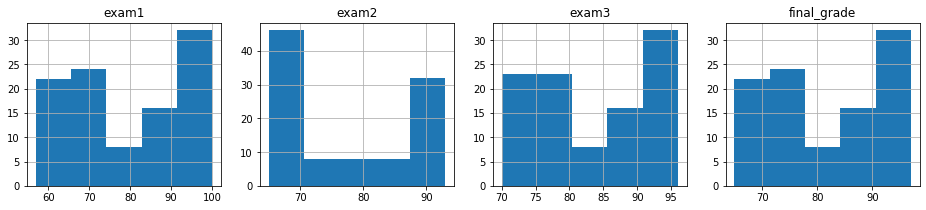

In [23]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

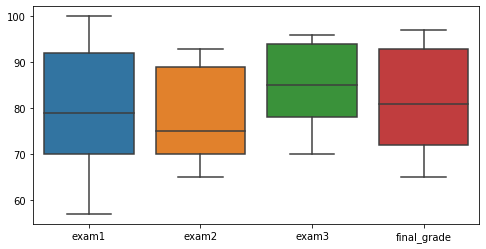

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))
plt.show()

# Moving Forward w/ Acquire/Prep
- Make a `wrangle.py` file with all the 
